# LINEAR REGRESSION

# QUESTION 1
1) Delivery_time -> Predict delivery time using sorting time 


# EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data['Sorting Time'].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting Time, dtype: float64

In [5]:
data['Delivery Time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery Time, dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [8]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [9]:
data1=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# correlation

In [10]:
data1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [11]:
import warnings
warnings.filterwarnings('ignore')

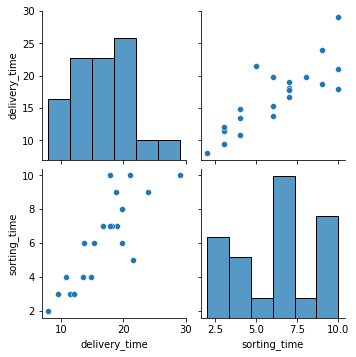

In [12]:
sns.pairplot(data1.iloc[:,0:2])

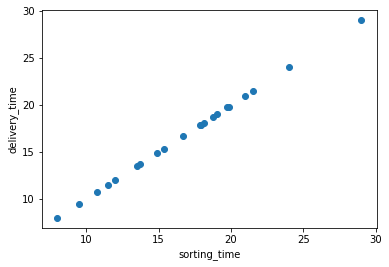

In [13]:
plt.scatter(x = data1['delivery_time'], y = data1['delivery_time'])
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.show()

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

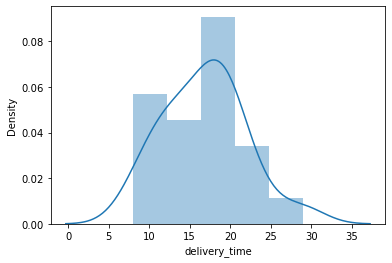

In [14]:
sns.distplot(data1['delivery_time'])

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

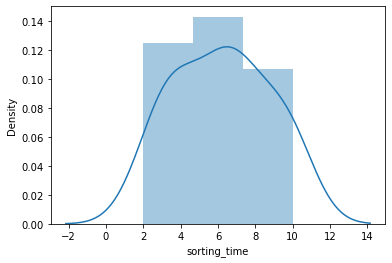

In [15]:
sns.distplot(data1['sorting_time'])

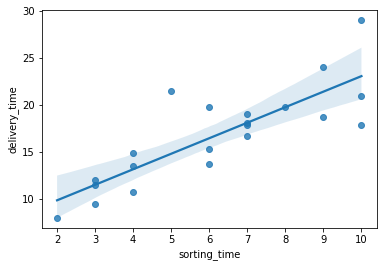

In [16]:
sns.regplot(x="sorting_time",y="delivery_time",data=data1);

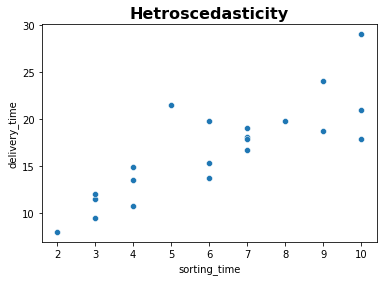

In [17]:
sns.scatterplot(x = 'sorting_time', y = 'delivery_time', data= data1)
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

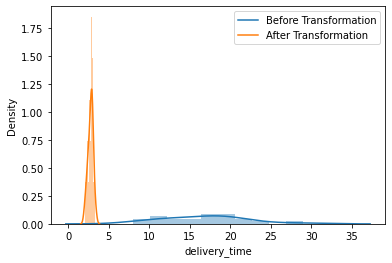

In [21]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data1['delivery_time'], bins = 10, kde = True)
sns.distplot(np.log(data1['delivery_time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()


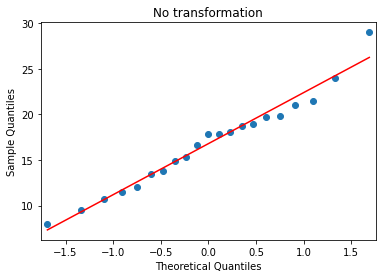

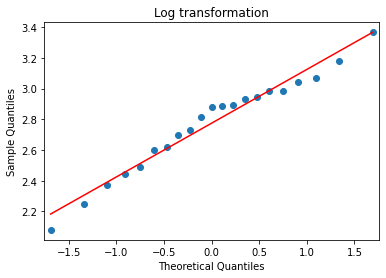

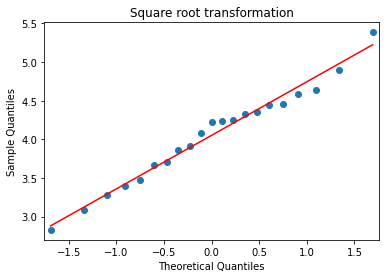

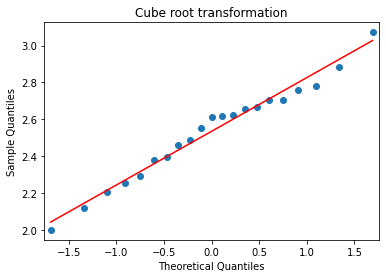

In [24]:
import statsmodels.api as sms
sms.qqplot(data1['delivery_time'], line = 'r')
plt.title('No transformation')
sms.qqplot(np.log(data1['delivery_time']), line = 'r')
plt.title('Log transformation')
sms.qqplot(np.sqrt(data1['delivery_time']), line = 'r')
plt.title('Square root transformation')
sms.qqplot(np.cbrt(data1['delivery_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# Model building and testing

In [16]:
model=smf.ols("delivery_time~sorting_time",data=data1).fit()

In [17]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
#Rsquare

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        16:43:10   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# t and pvalue

In [20]:
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


# square root

In [58]:
model1 = smf.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', data = data1).fit()


In [59]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Thu, 30 Mar 2023   Prob (F-statistic):           8.48e-07
Time:                            16:45:44   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cube Root 

In [21]:
import statsmodels.formula.api as smf

In [22]:
model2 = smf.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)', data = data1).fit()

In [23]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Thu, 30 Mar 2023   Prob (F-statistic):           4.90e-07
Time:                            16:43:10   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation

In [24]:
model3 = smf.ols('np.log(delivery_time)~np.log(sorting_time)', data = data1).fit()

In [25]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 30 Mar 2023   Prob (F-statistic):           1.60e-07
Time:                           16:43:11   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Predictions

In [26]:
newdata=pd.Series([5,10])

In [27]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [28]:
data_pred

,sorting_time
0,5
1,10


In [29]:
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64